In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [141]:
data= pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [143]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [144]:
data.drop(["date", "id", "zipcode", "condition", "lat", "long"], axis=1, inplace=True)


In [145]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [146]:
data.shape

(21613, 15)

In [147]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

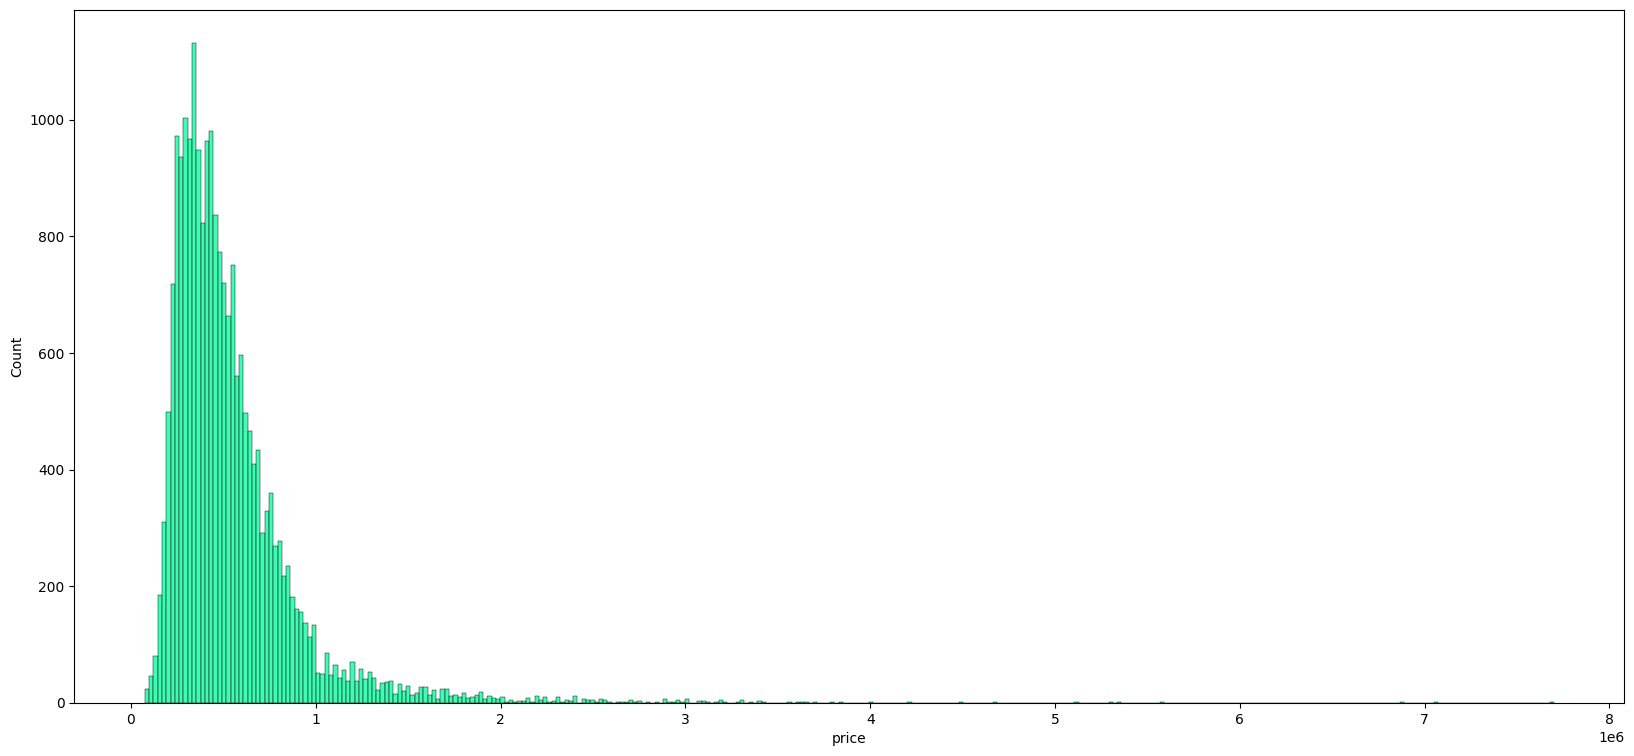

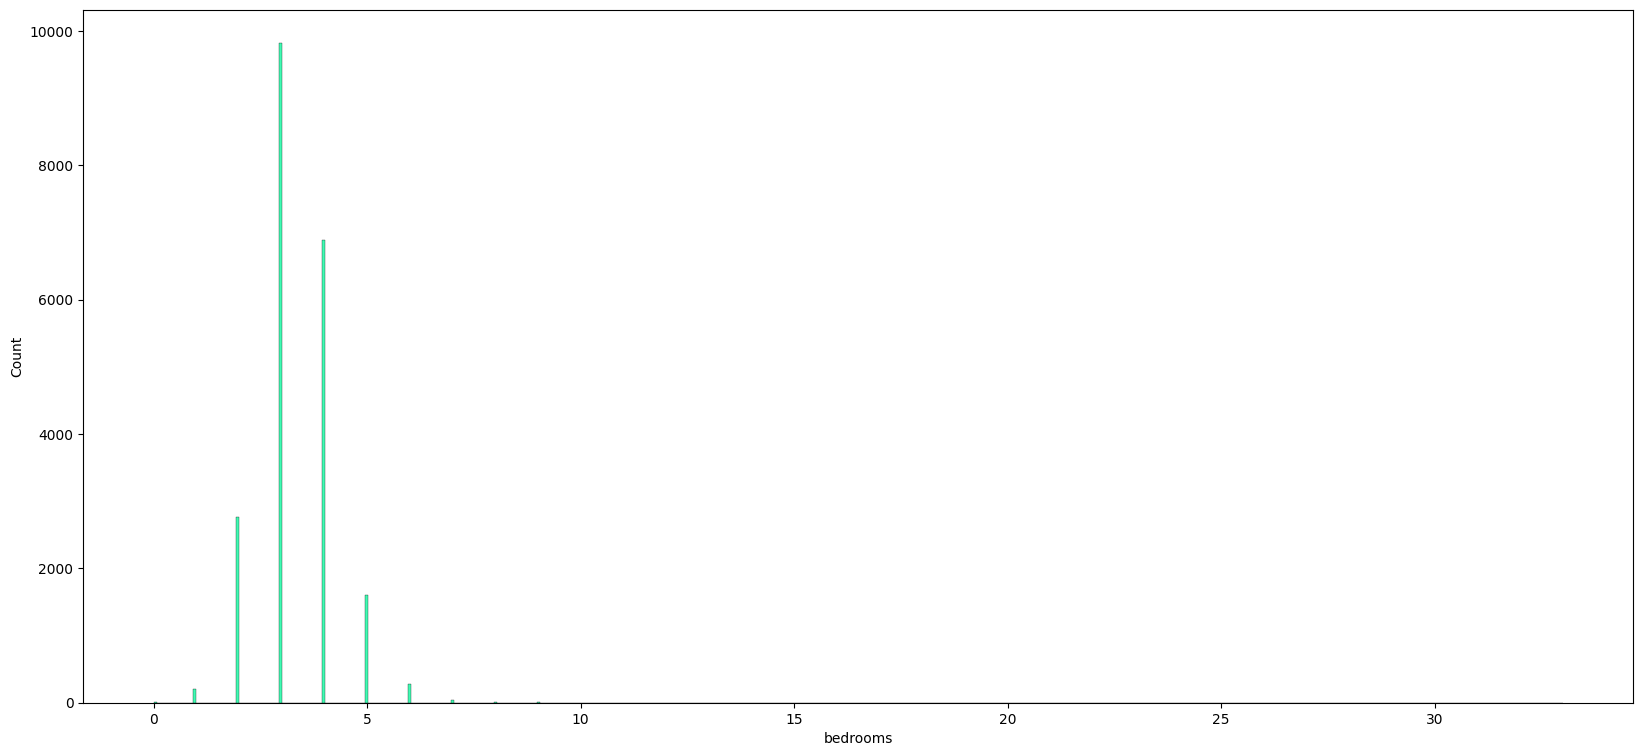

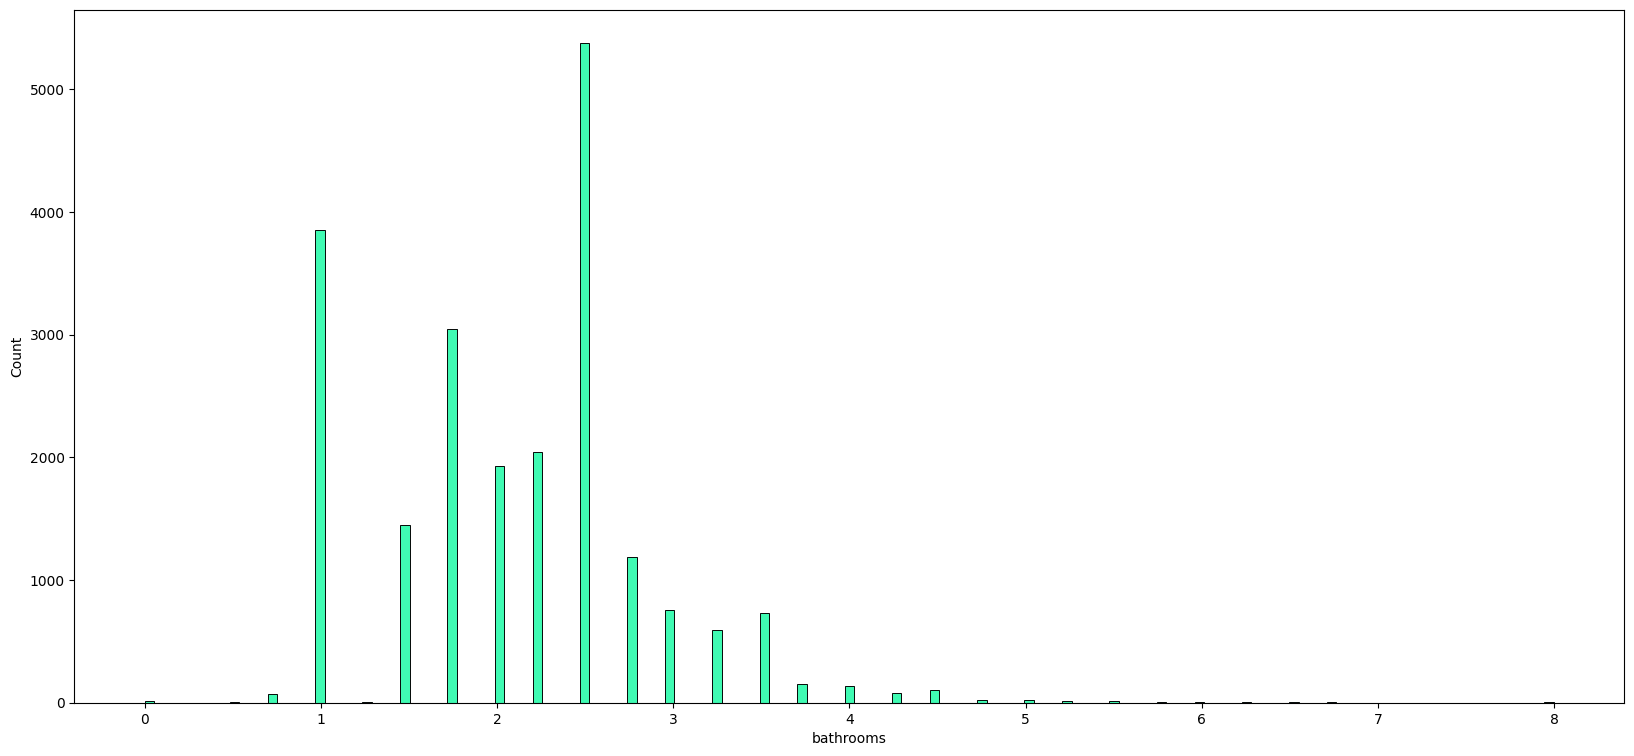

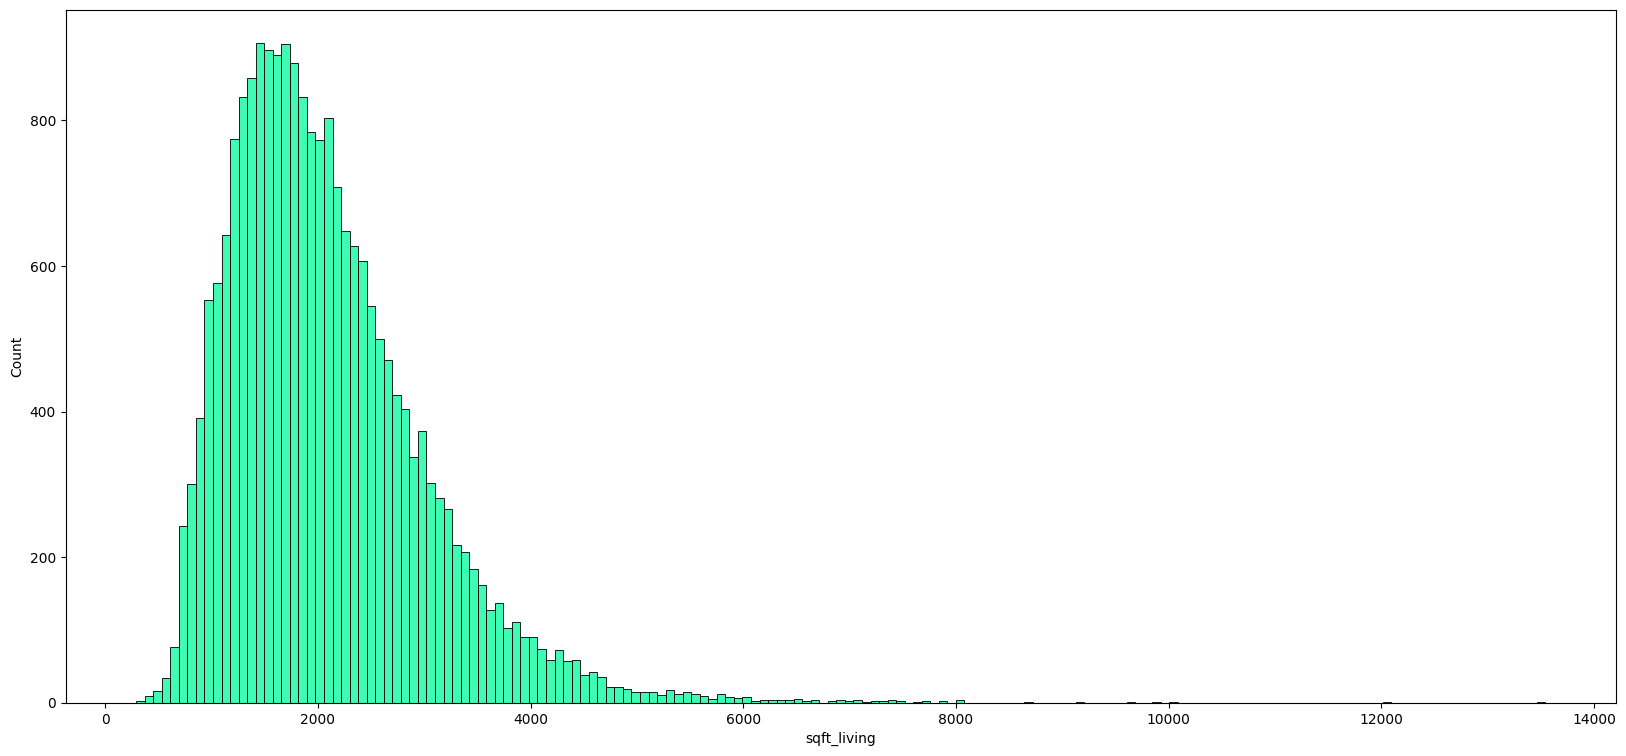

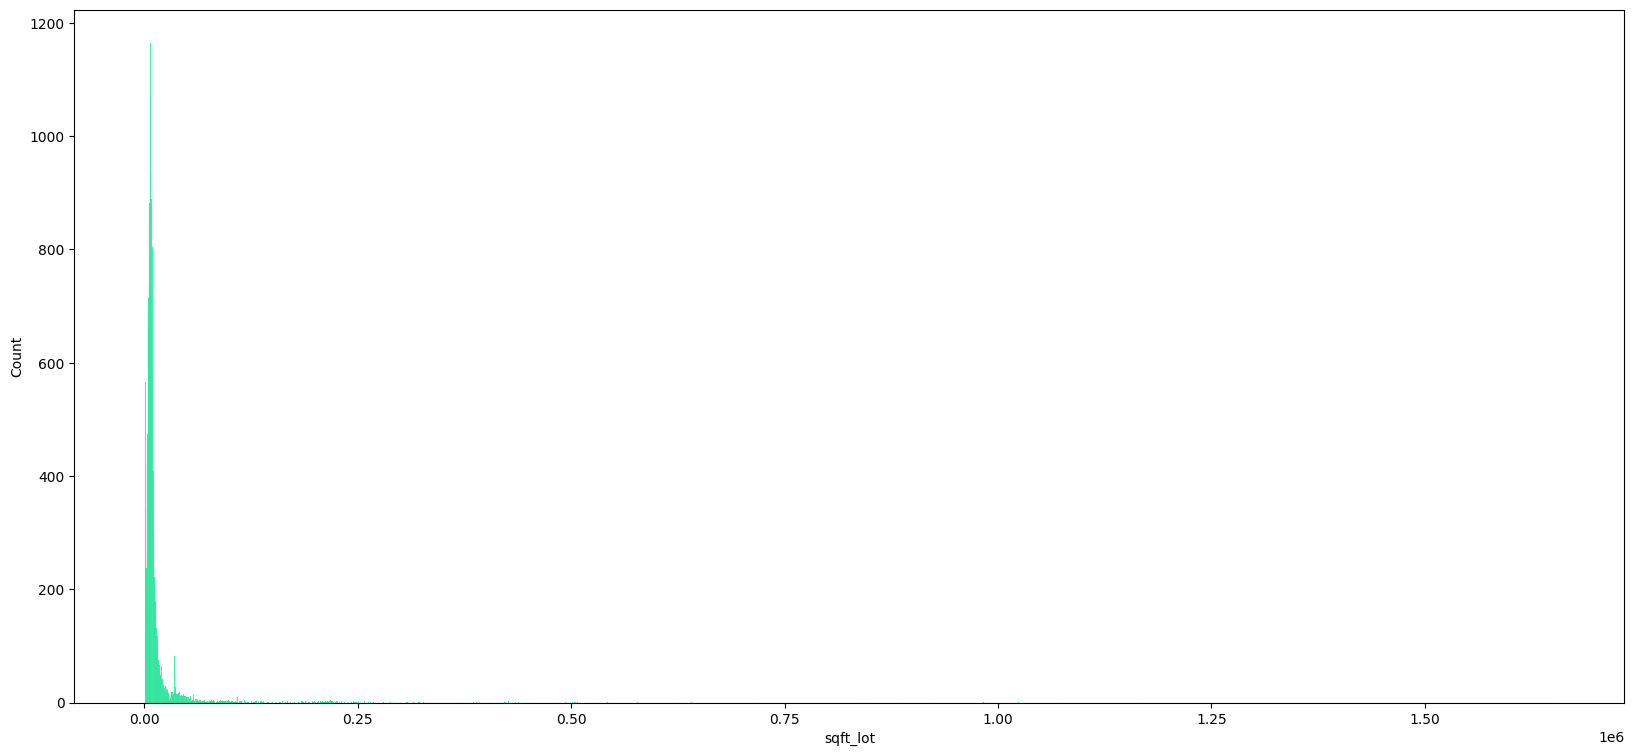

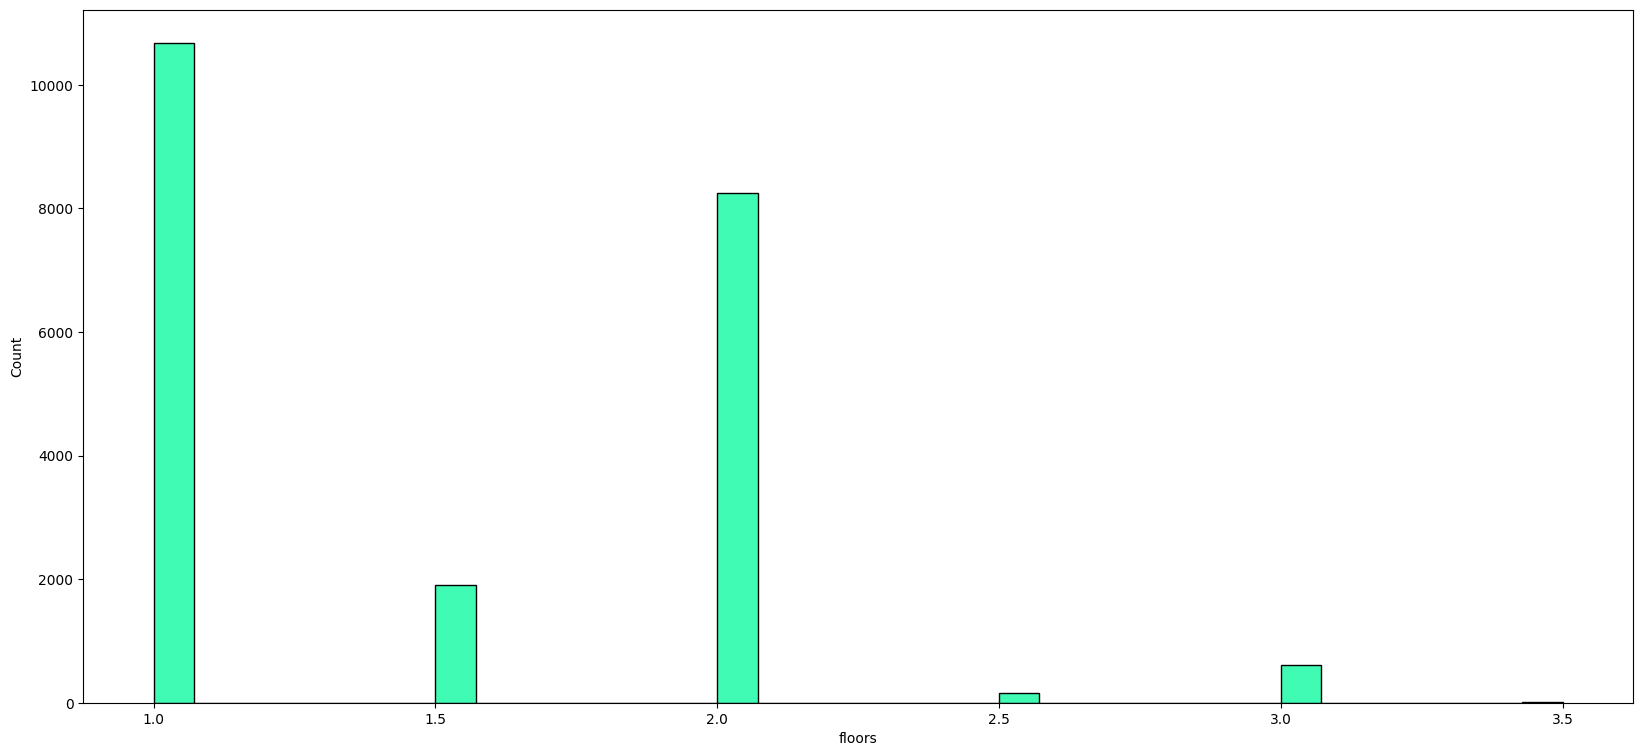

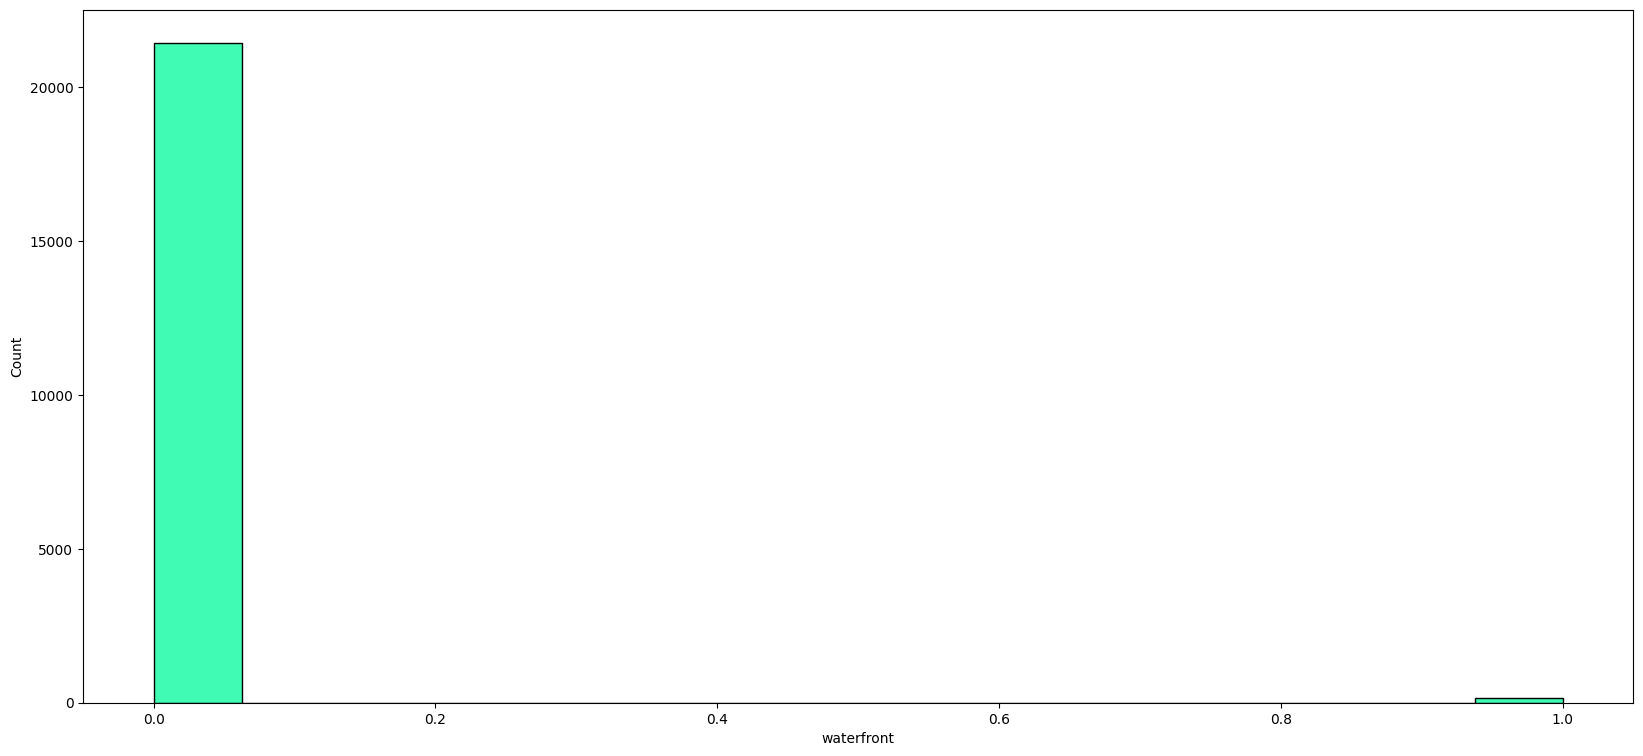

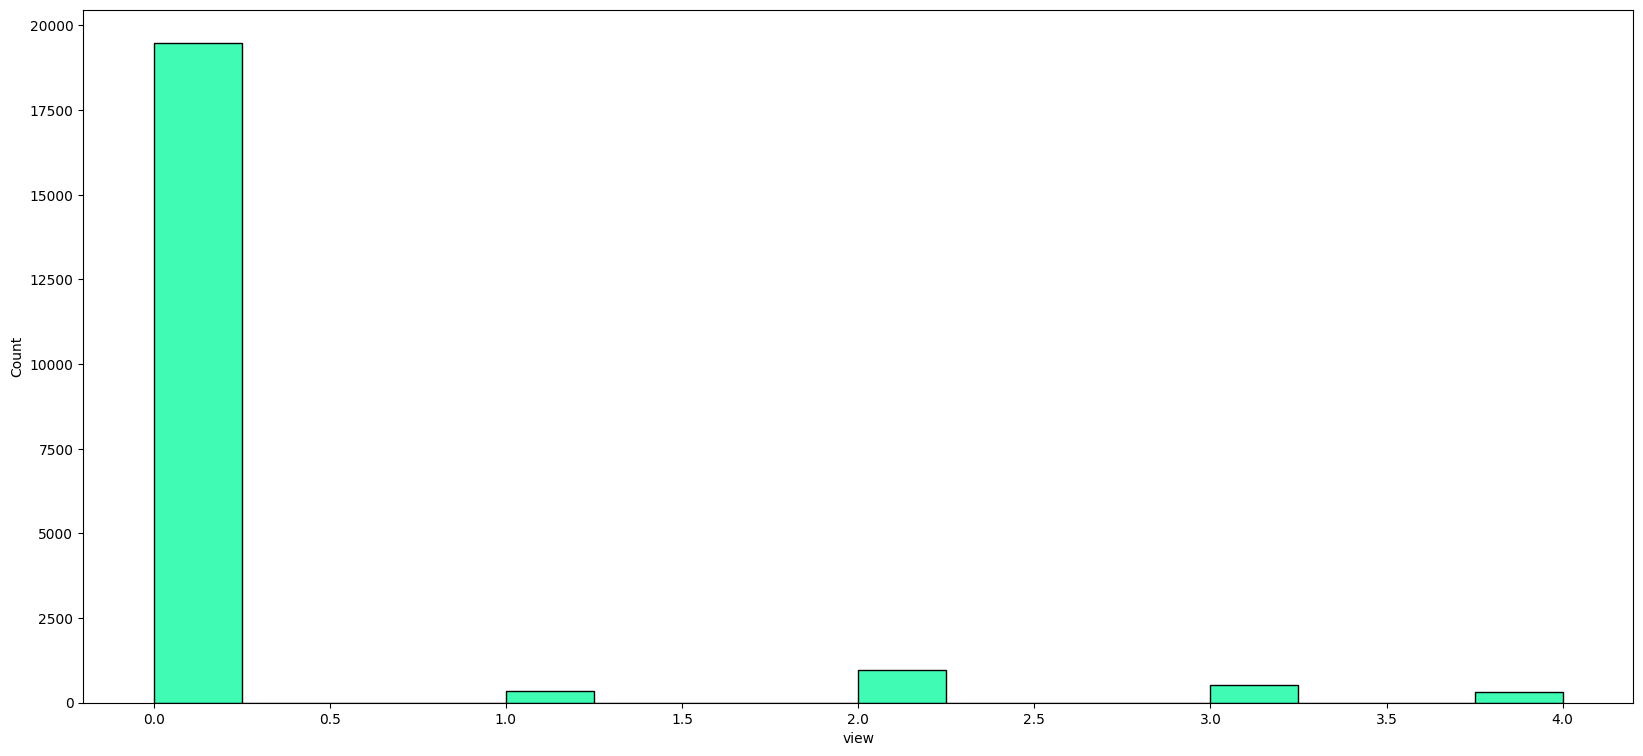

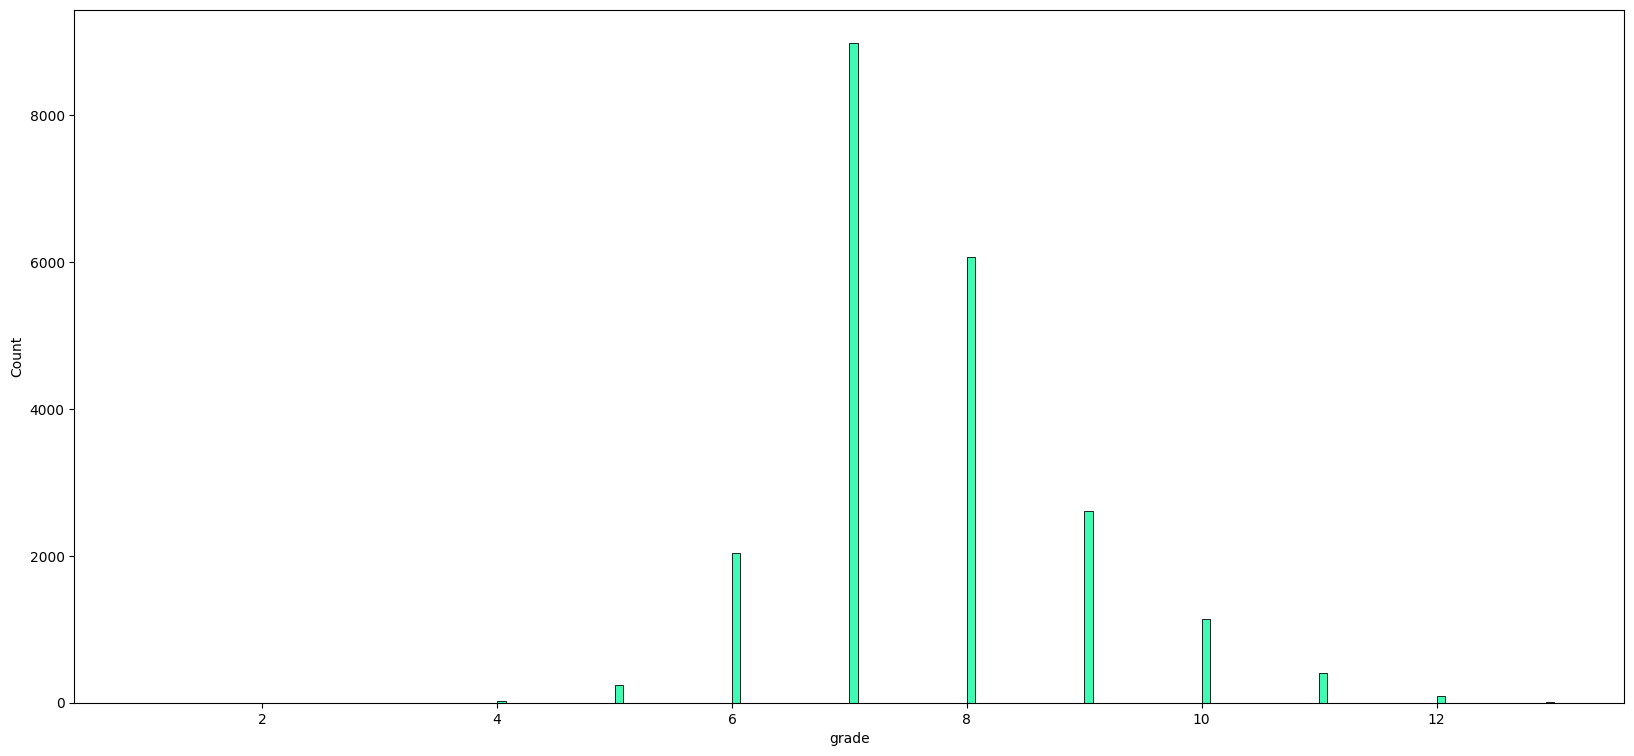

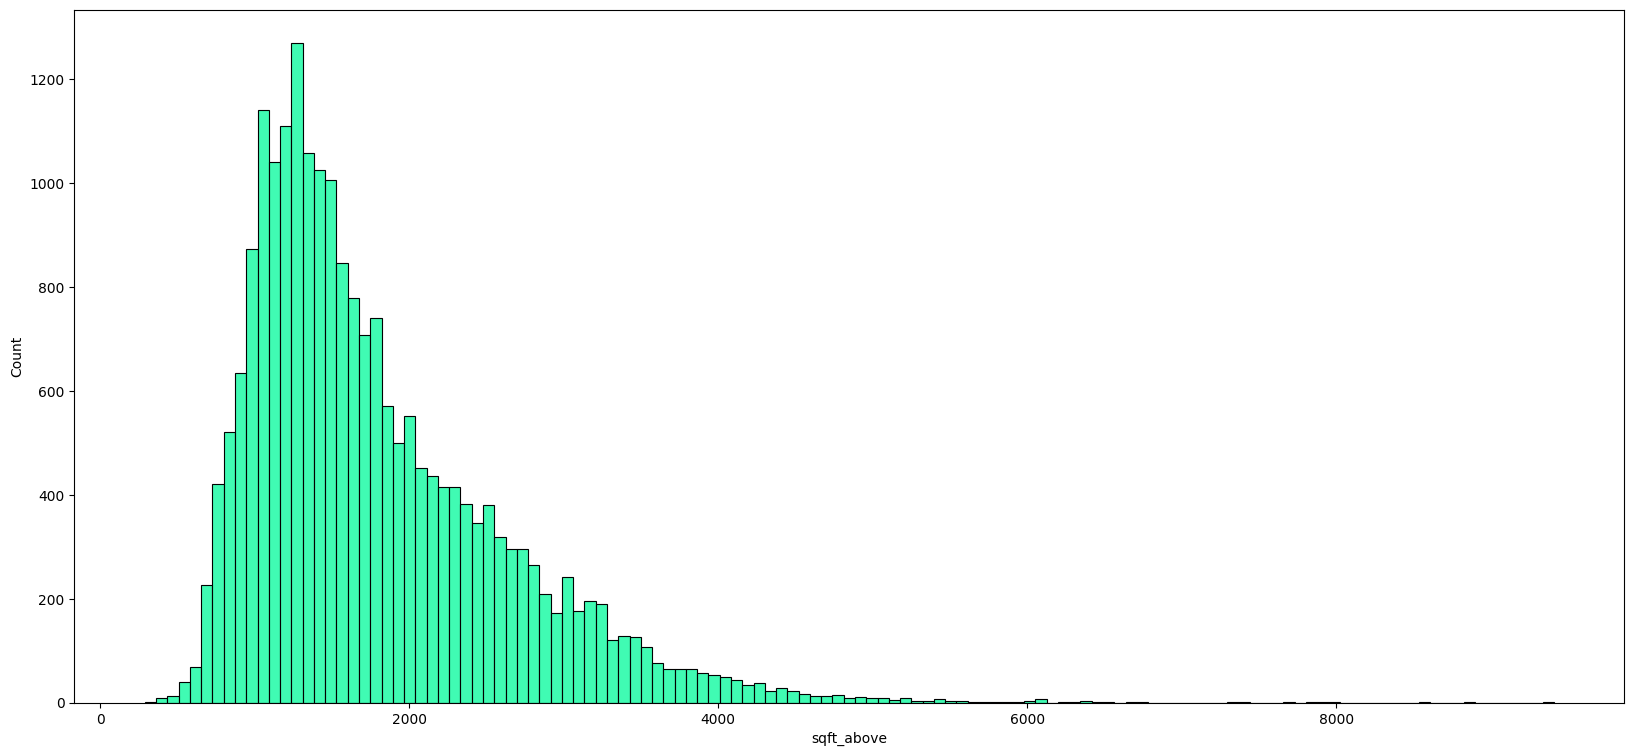

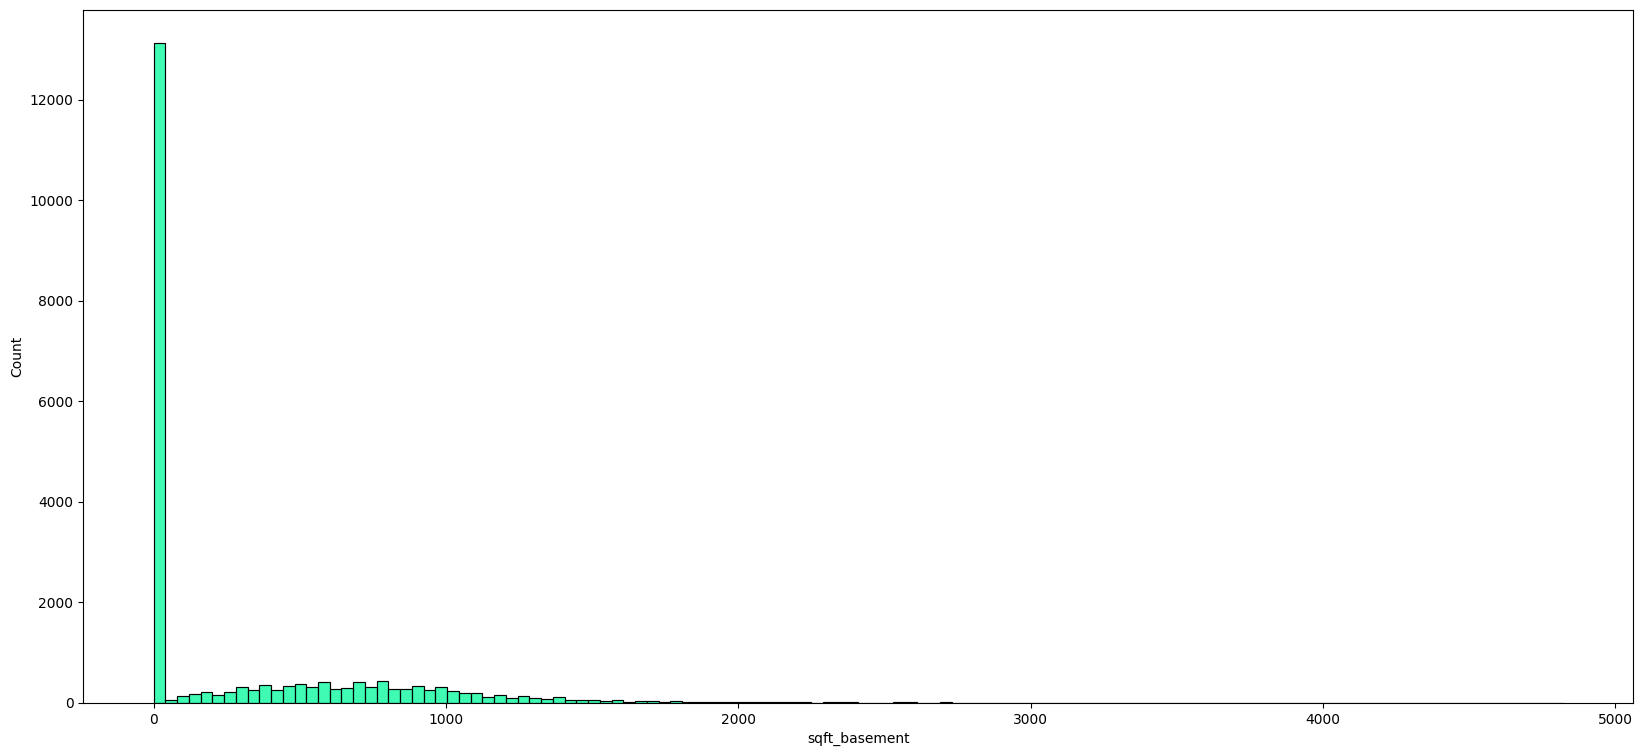

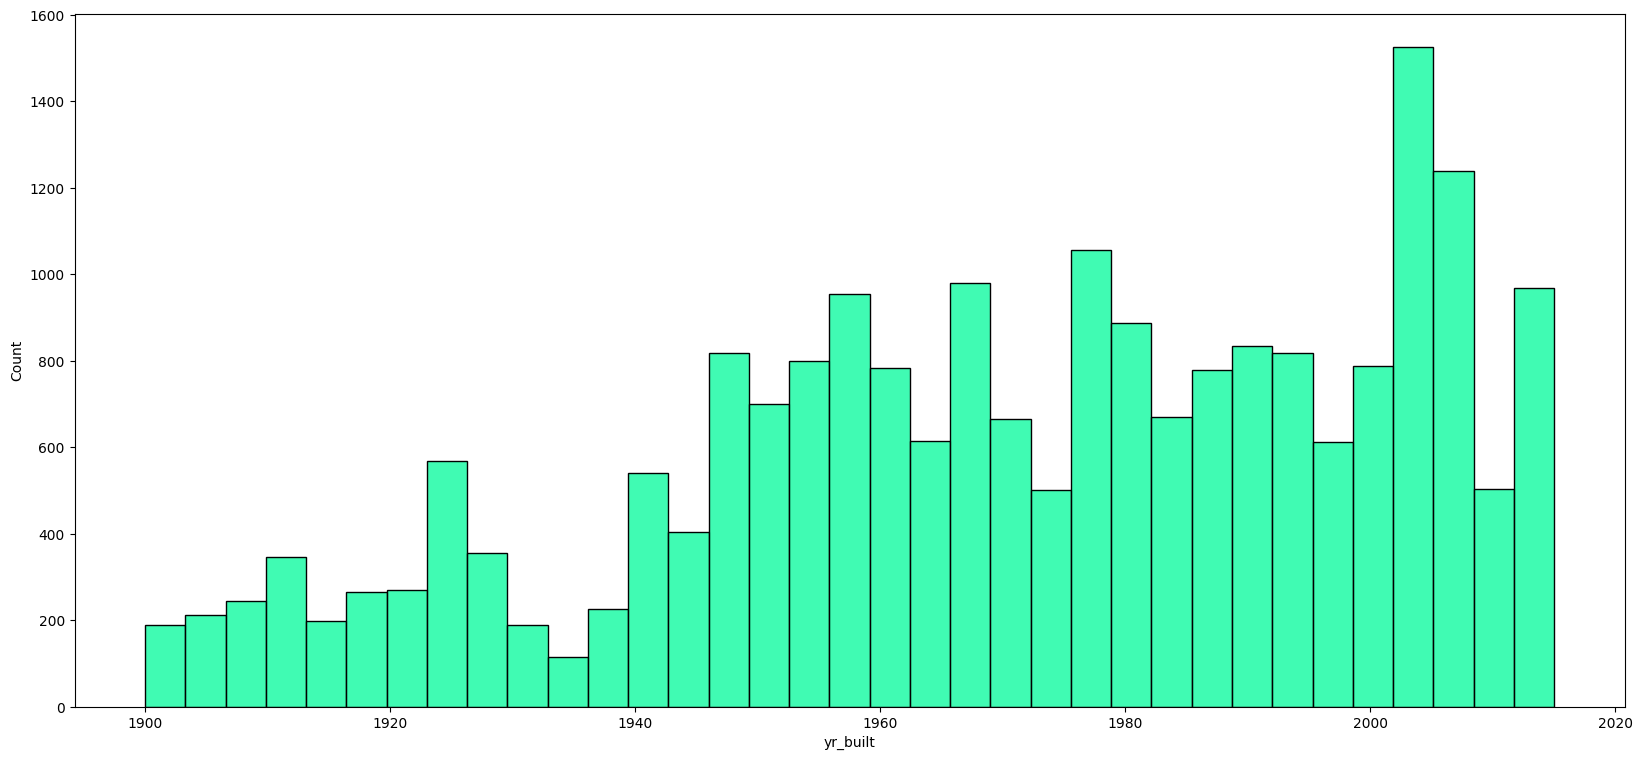

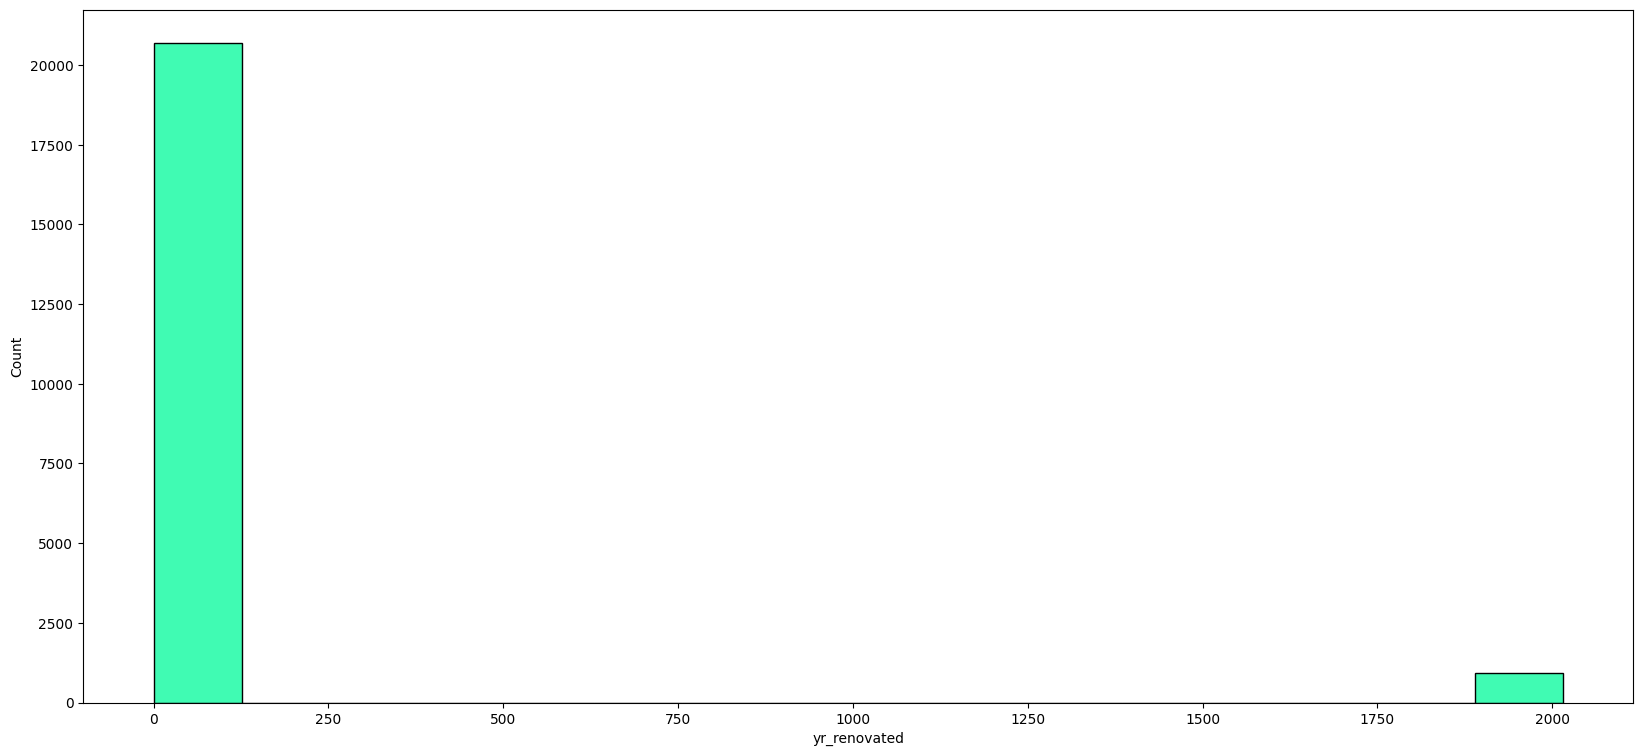

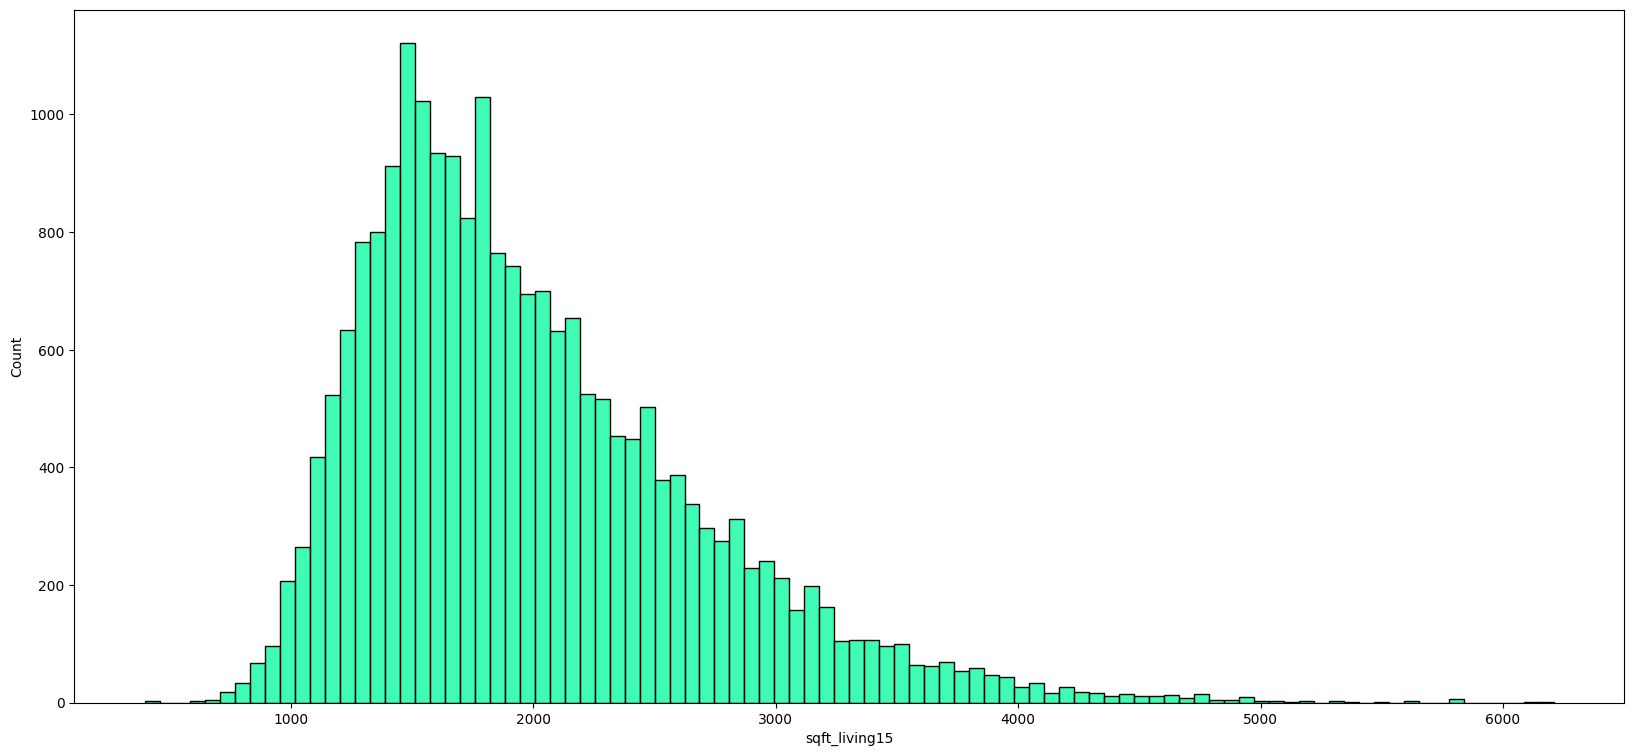

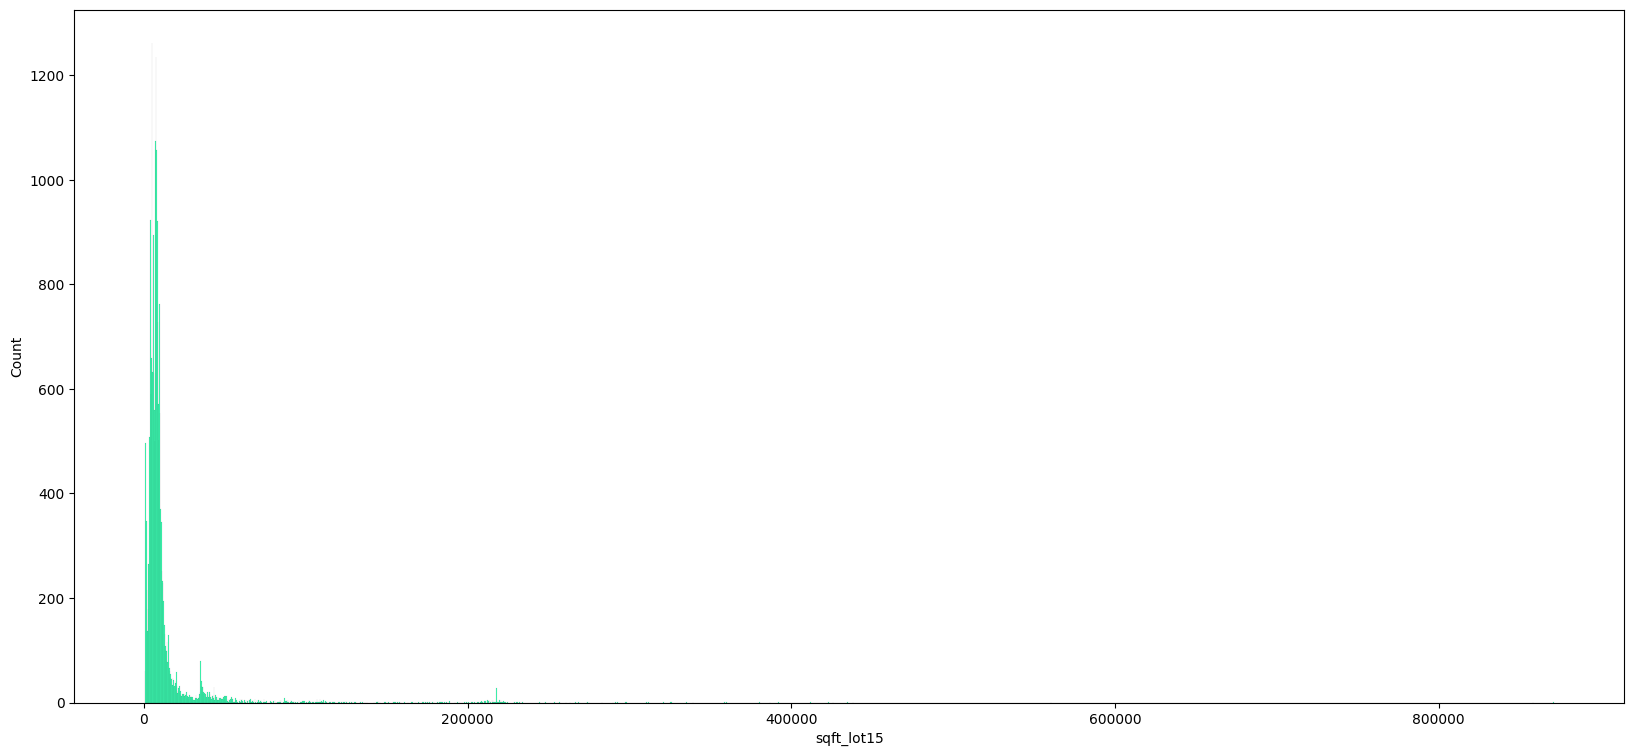

In [148]:
for col in data.columns:
    plt.figure(figsize=(20,9))
    sns.histplot(data[col], color="mediumspringgreen")
    plt.show()

In [149]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,8,1600,0,2004,0,1410,1287


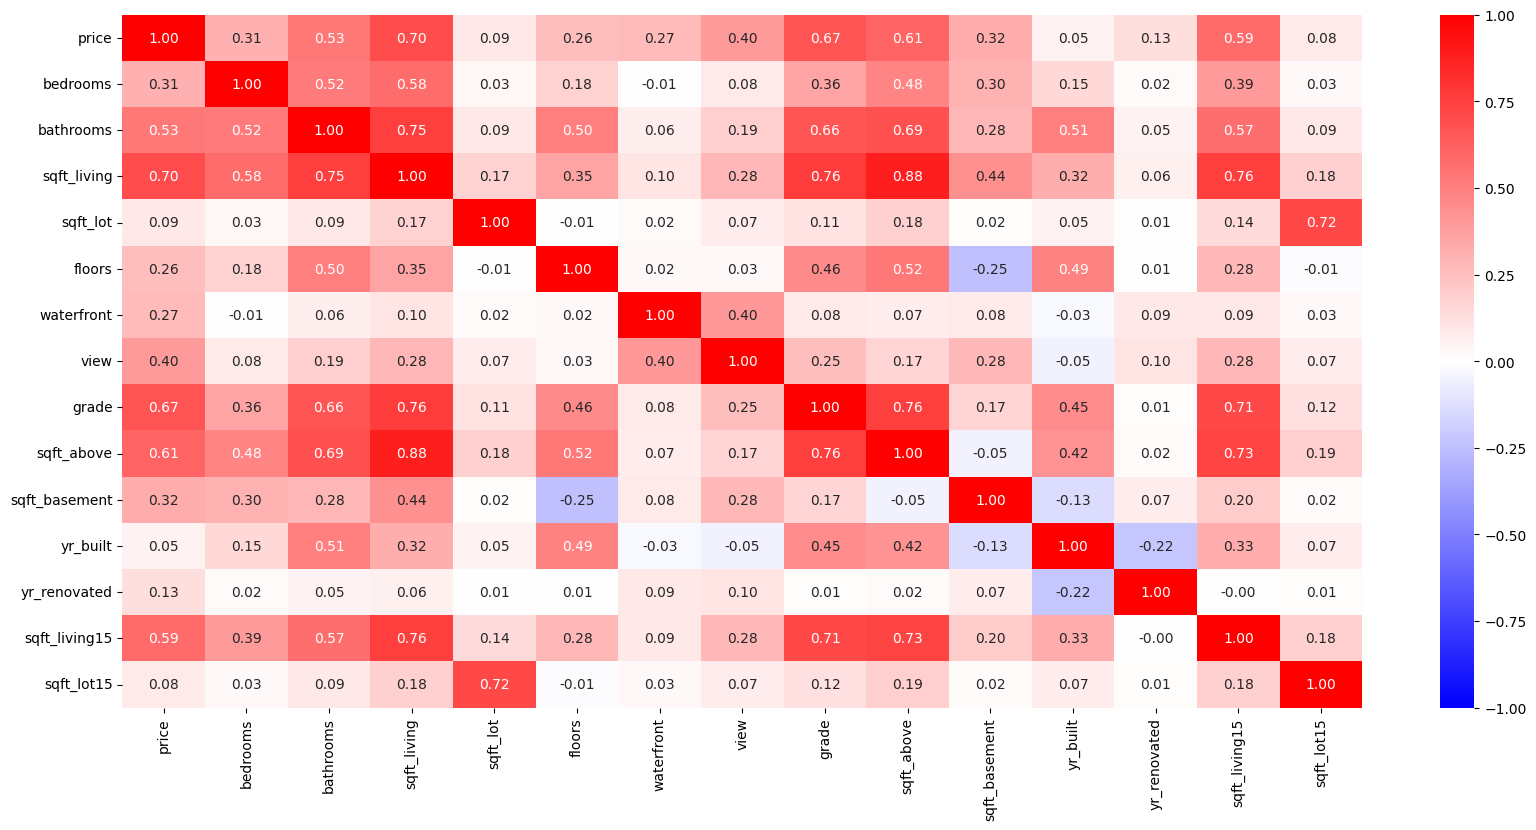

In [151]:
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), cmap="bwr", vmin=-1, annot=True, fmt=".2f")
plt.show()

In [152]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
data = pd.DataFrame(rs.fit_transform(data), columns=data.columns)

In [153]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=50).fit(data)
pd.Series(dbscan.labels_).unique()

array([ 0, -1])

In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

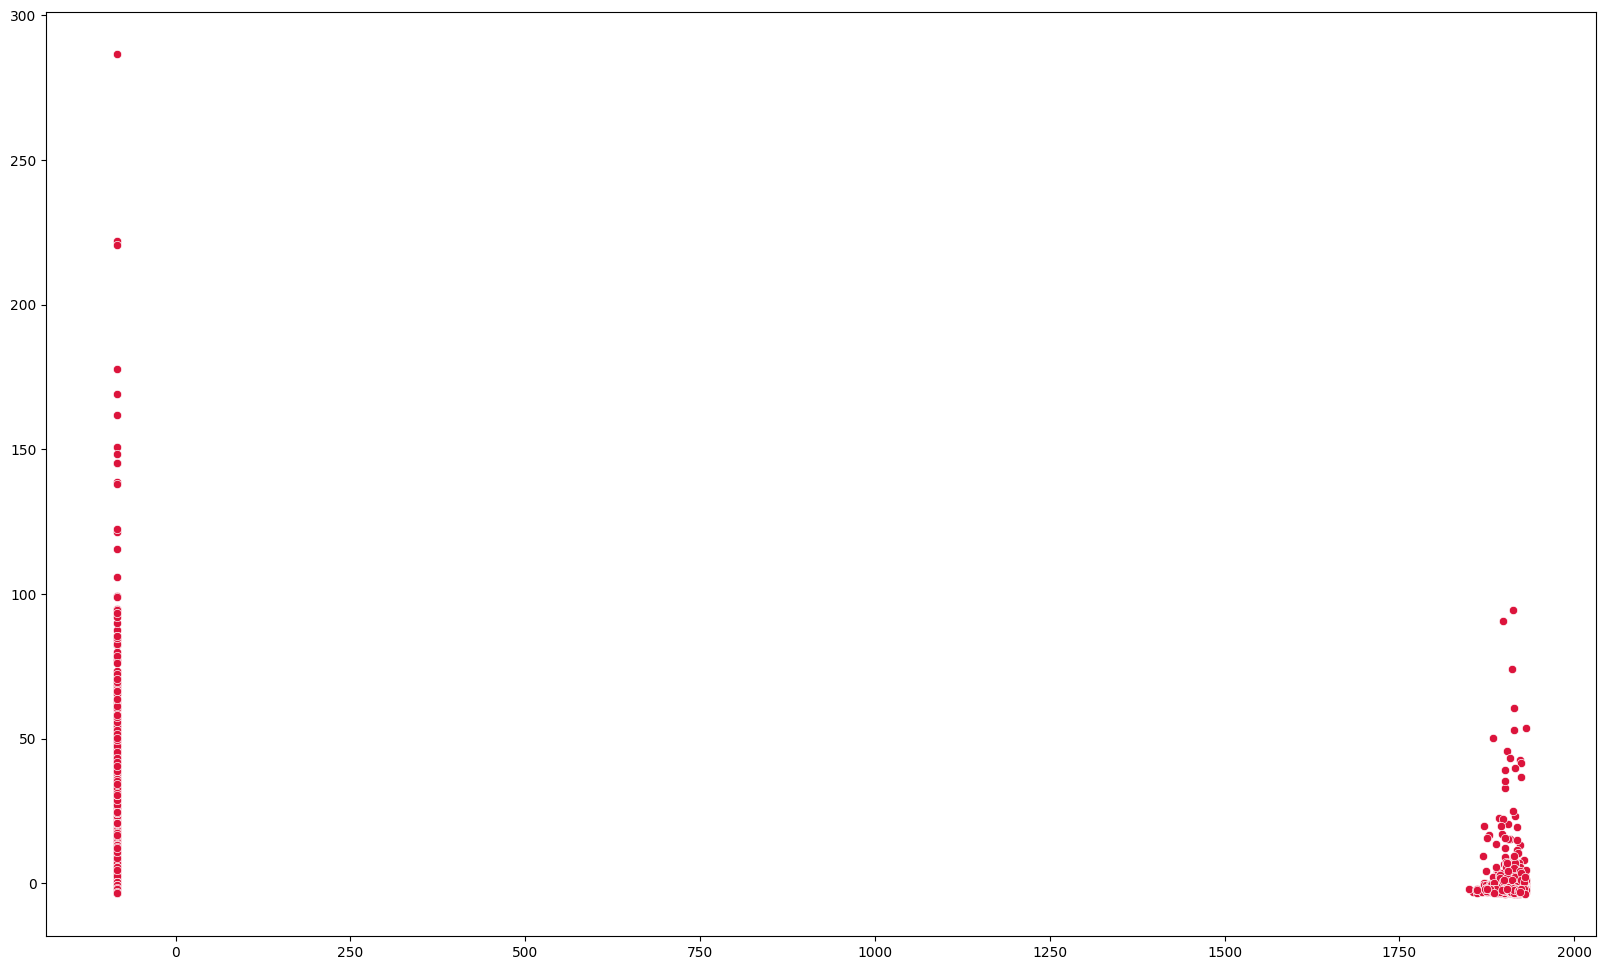

In [157]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], color="crimson")
plt.show()

In [159]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_data = tsne.fit_transform(data)

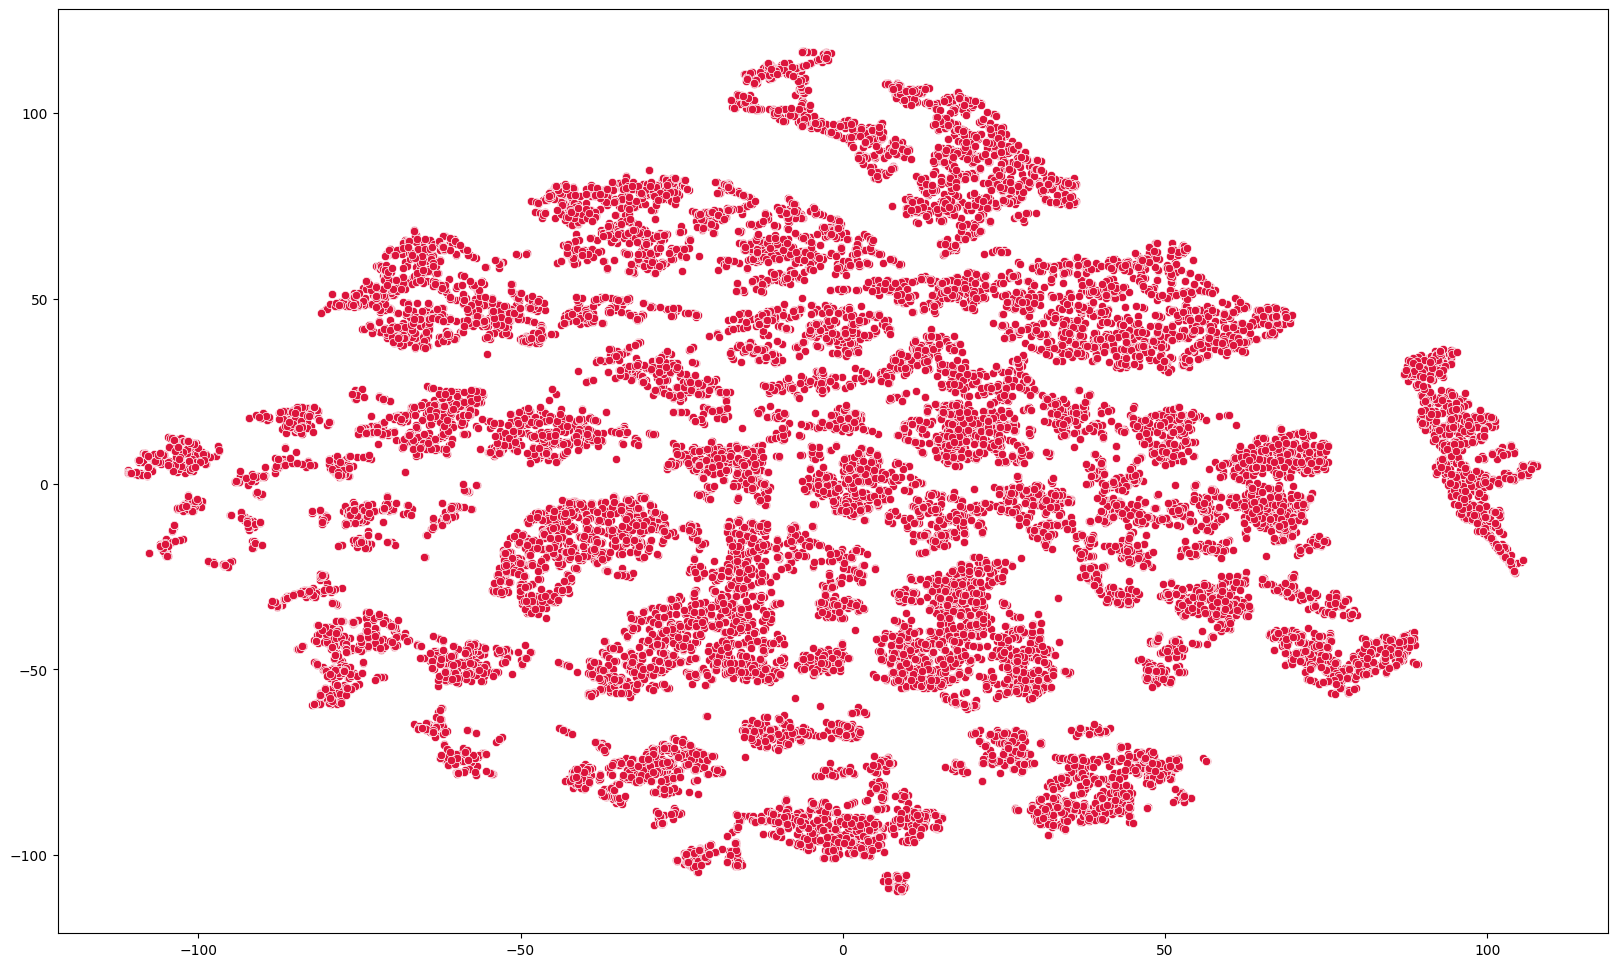

In [162]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], color="crimson")
plt.show()

In [173]:
from umap import UMAP
umap = UMAP(random_state=42)
embedding = umap.fit_transform(data)

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


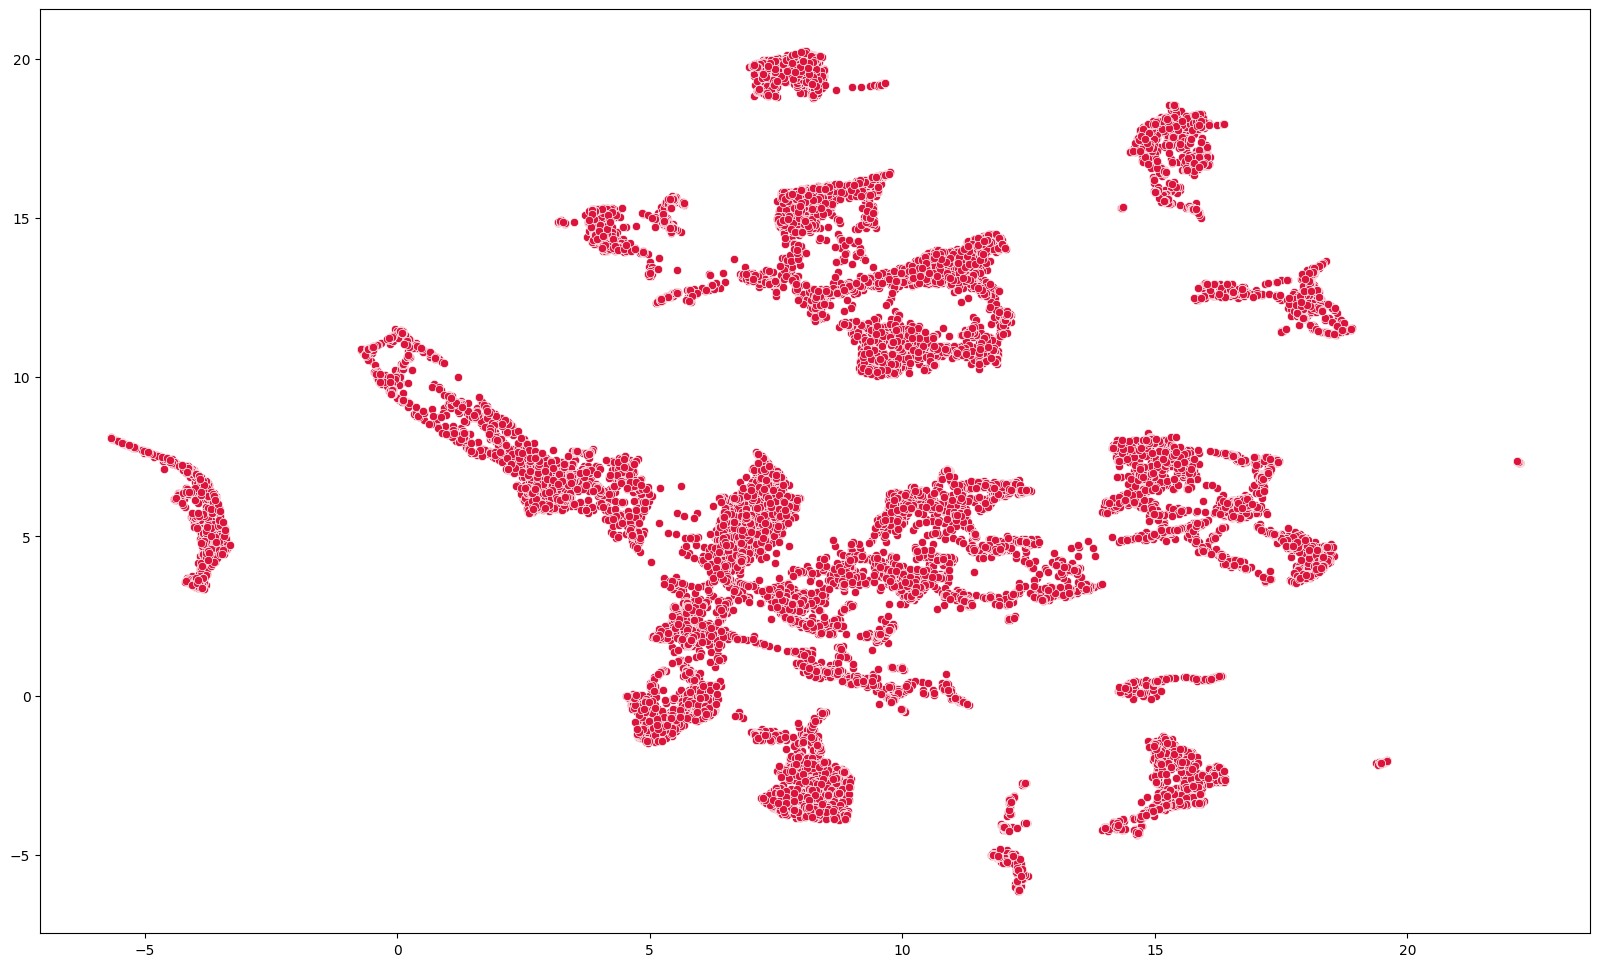

In [174]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], color="crimson")
plt.show()

In [175]:
colors = ["black", "crimson", "blue", "green", "lime", "peru", "orange", "blueviolet", "darkturquoise", "cornflowerblue", "slategray", "magenta", "brown", "yellow"]

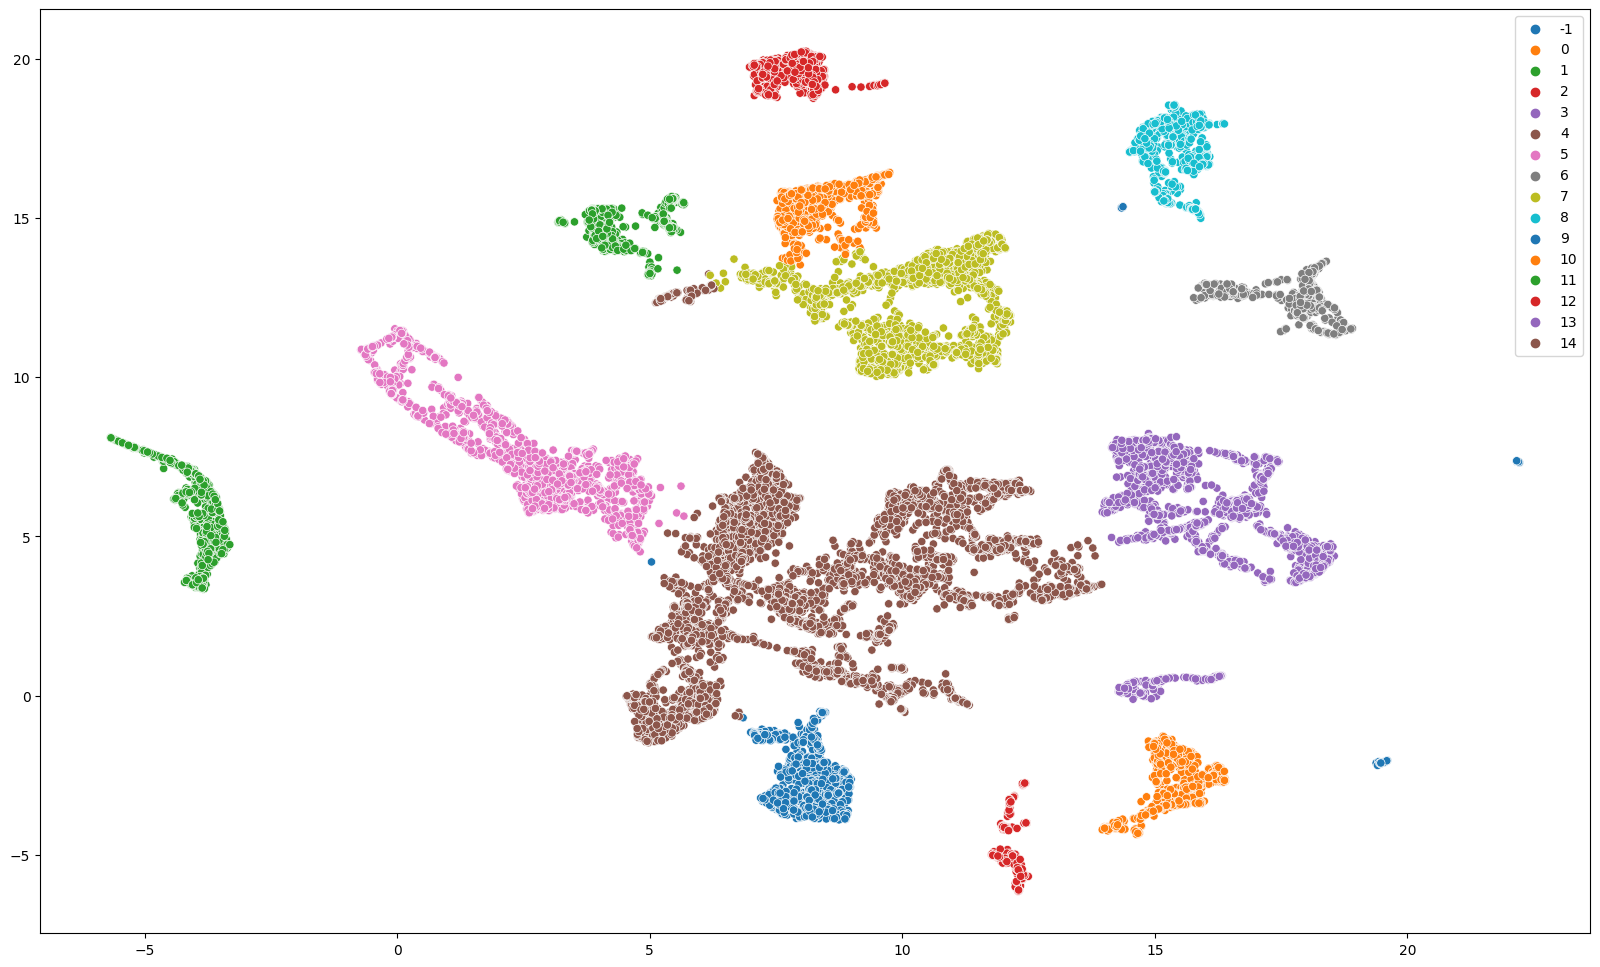

In [177]:
dbscan = DBSCAN(0.6, min_samples=55).fit(embedding)

plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=dbscan.labels_, palette="tab10")
plt.show()

In [178]:
cluster_labels = pd.Series(dbscan.labels_)
cluster_labels.value_counts()

 4     6592
 7     2757
 3     2275
 5     1813
 9     1114
 8     1020
 0     1001
 10     919
 1      914
 6      816
 2      747
 11     743
 12     367
 13     294
 14     140
-1      101
Name: count, dtype: int64

In [179]:
for i in [14, 13]:
    cluster_labels[cluster_labels==i] = -1

In [180]:
cluster_labels.value_counts()

 4     6592
 7     2757
 3     2275
 5     1813
 9     1114
 8     1020
 0     1001
 10     919
 1      914
 6      816
 2      747
 11     743
-1      535
 12     367
Name: count, dtype: int64

In [181]:
colors = ["black", "crimson", "blue", "green", "lime", "peru", "orange", "blueviolet", "darkturquoise", "cornflowerblue", "slategray", "magenta", "brown", "yellow"]

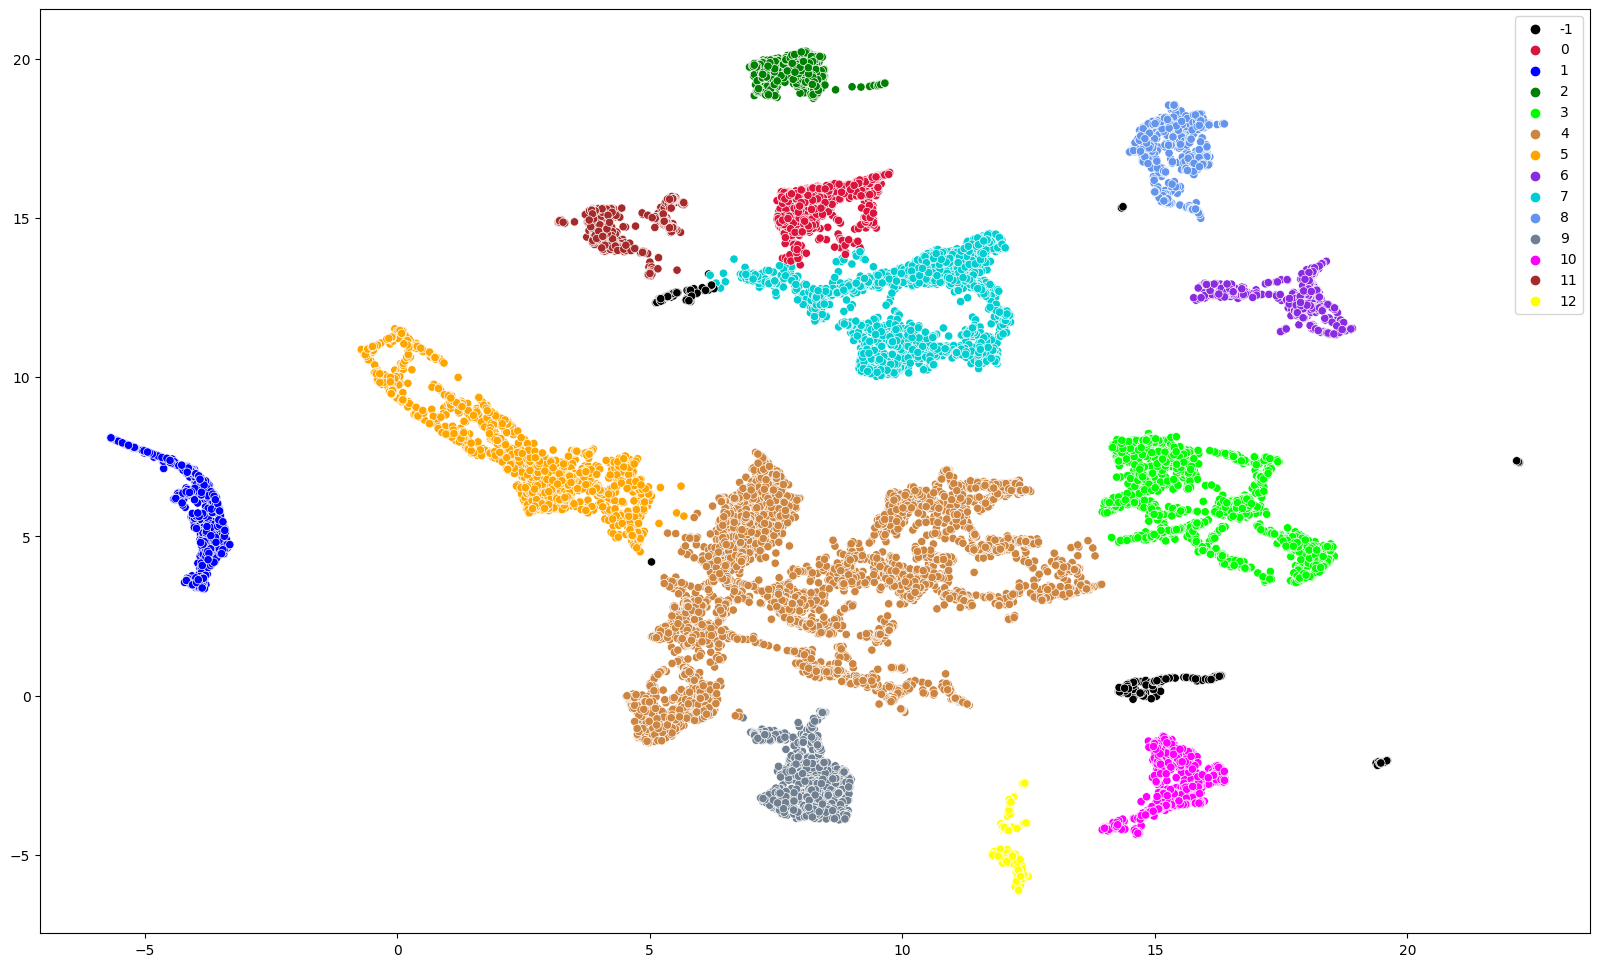

In [182]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=cluster_labels, palette=colors)
plt.show()